# **Exploratory Data Analysis of Most Runs and Average Strike Rate Dataset**

### **We will be analysing the Most Runs and Average Strike Rate dataset**

In [1]:
# Importing the Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Reading the excel file
runs_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Exploratory Data Analysis/3. IPL/4. Most Runs and Average Strike Rate/most_runs_average_strikerate.csv')

# **Step 1: Skimming over the Dataset and Analysing the Data**

### **Before data cleaning and analysing, we need to get general overview of our data**

In [4]:
# Get the Number of Rows and Column of Dataset
runs_df.shape

(516, 6)

In [5]:
# Get the type of values each columns contain using info() method
runs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   batsman        516 non-null    object 
 1   total_runs     516 non-null    int64  
 2   out            516 non-null    int64  
 3   numberofballs  516 non-null    int64  
 4   average        482 non-null    float64
 5   strikerate     516 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 24.3+ KB


In [8]:
# Get the basic overview of our dataset
runs_df.describe

<bound method NDFrame.describe of             batsman  total_runs  out  numberofballs    average  strikerate
0           V Kohli        5426  152           4111  35.697368  131.987351
1          SK Raina        5386  160           3916  33.662500  137.538304
2         RG Sharma        4902  161           3742  30.447205  130.999466
3         DA Warner        4717  114           3292  41.377193  143.286756
4          S Dhawan        4601  137           3665  33.583942  125.538881
..              ...         ...  ...            ...        ...         ...
511        ND Doshi           0    1             13   0.000000    0.000000
512         J Denly           0    1              1   0.000000    0.000000
513         S Ladda           0    2              9   0.000000    0.000000
514  V Pratap Singh           0    1              1   0.000000    0.000000
515       S Kaushik           0    1              1   0.000000    0.000000

[516 rows x 6 columns]>

In [7]:
# List of columns
runs_df.columns

Index(['batsman', 'total_runs', 'out', 'numberofballs', 'average',
       'strikerate'],
      dtype='object')

In [9]:
# Print
runs_df

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881
...,...,...,...,...,...,...
511,ND Doshi,0,1,13,0.000000,0.000000
512,J Denly,0,1,1,0.000000,0.000000
513,S Ladda,0,2,9,0.000000,0.000000
514,V Pratap Singh,0,1,1,0.000000,0.000000


# **Step 2: Data Cleaning and Processing**

### **In this step we will be cleaning the data (ex: removing null values, and empty columns if any)**

In [10]:
# Get all the null values from the matches table
runs_df.isnull().sum()

batsman           0
total_runs        0
out               0
numberofballs     0
average          34
strikerate        0
dtype: int64

In [11]:
# Let's update the column names
runs_df.rename(columns = {'numberofballs' : 'number_of_balls', 'strikerate' : 'strike_rate'}, inplace = True)

In [12]:
# Check the updated columns
runs_df.columns

Index(['batsman', 'total_runs', 'out', 'number_of_balls', 'average',
       'strike_rate'],
      dtype='object')

# **Step 3: Analysing our dataset**

### **In this step we will be analysing the dataset**

# **Objective - Runs and Average Strike Rate Dataset**
**1. Players with highest total runs**

**2. Player that got out highest number of times**

**3. Player with best average runs**

**4. Player with best strike rate and score above 3000 runs**

**5. Top 5 players with more than 4000 runs, strike rate above 130 and average above 30**

**6. Final Conclusion of Runs and Strike Rate DataFrame**

## **Task-1 Player with Highest Total Runs**

### **In this step we will be getting the Player with Highest Total Runs**

In [13]:
# Lets sort the values according to total_runs
runs_df.sort_values(by = 'total_runs', ascending = False, inplace = True)

In [14]:
# Top 25 IPL Players according to runs
highest_total_runs_df = runs_df.head(25).copy()

In [15]:
# Select column that we want to use
highest_total_runs_df = highest_total_runs_df[['batsman', 'total_runs']]

In [16]:
# Print df
highest_total_runs_df

,batsman,total_runs
0,V Kohli,5426
1,SK Raina,5386
2,RG Sharma,4902
3,DA Warner,4717
4,S Dhawan,4601
5,CH Gayle,4525
6,MS Dhoni,4450
7,RV Uthappa,4420
8,AB de Villiers,4414
9,G Gambhir,4219


In [17]:
# Sort the values in ascending order
highest_total_runs_df.sort_values(by = 'total_runs', ascending = True, inplace = True)

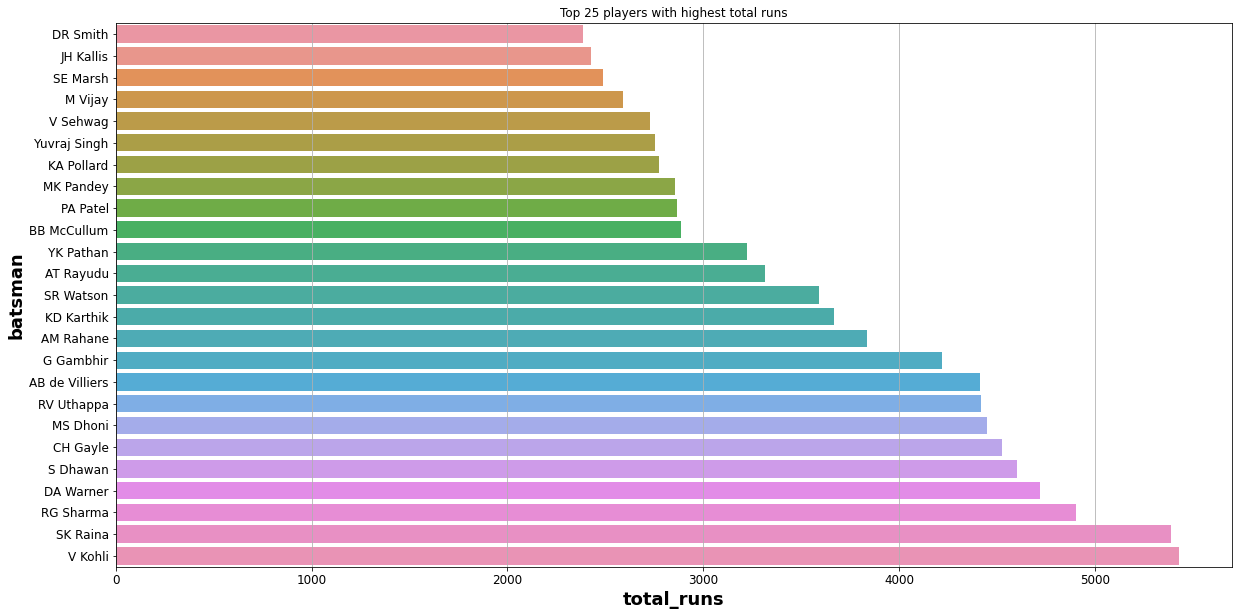

In [18]:
# Lets plot the top 25 players graph
plt.figure(figsize = (20, 10))
plt.grid()

plt.xlabel('Total Runs', fontweight = 'bold', fontsize = 18)
plt.ylabel('Players', fontweight = 'bold', fontsize = 18)

plt.tick_params(labelsize = 12)
plt.title('Top 25 players with highest total runs')
sns.barplot(x = 'total_runs', y = 'batsman', data = highest_total_runs_df);

## **Conclusion**

**We can clearly see that 'Virat Kohli' - 5426, is the highest run scorrer in IPL, followed by the 'Suresh K Raina' - 5386**

## **Task-2 Player that got out highest number of times**

### **In this step we will be getting the Player that got out highest number of times**

In [19]:
# Lets sort the values according to out
runs_df.sort_values(by = 'out', ascending = False, inplace = True)

In [20]:
# Top 25 IPL Players that got out most number of times
highest_total_out_df = runs_df.head(25).copy().reset_index()

In [21]:
# Get the columns that we want to use
highest_total_out_df = highest_total_out_df[['batsman', 'out']]

In [22]:
# Print df
highest_total_out_df

,batsman,out
0,RG Sharma,161
1,SK Raina,160
2,RV Uthappa,156
3,V Kohli,152
4,KD Karthik,138
5,S Dhawan,137
6,G Gambhir,134
7,PA Patel,127
8,MS Dhoni,118
9,AM Rahane,117


In [23]:
# Sort the values in ascending
highest_total_out_df.sort_values(by = 'out', ascending = True, inplace = True)

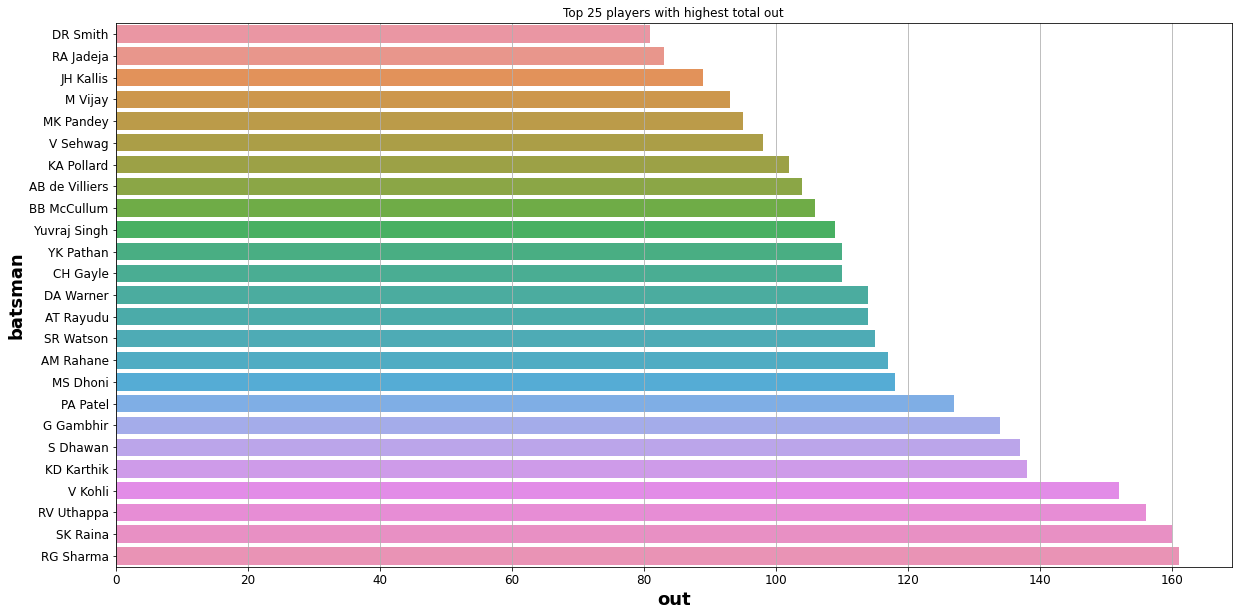

In [24]:
# Lets plot the top 25 players graph
plt.figure(figsize = (20, 10))
plt.grid()

plt.xlabel('Number of Times got Out', fontweight = 'bold', fontsize = 18)
plt.ylabel('Players', fontweight = 'bold', fontsize = 18)

plt.tick_params(labelsize = 12)
plt.title('Top 25 players with highest total out')
sns.barplot(x = 'out', y = 'batsman', data = highest_total_out_df);

## **Conclusion**

**We can clearly see that 'Rohit G Sharma' - 161, got out most number of times in IPL, followed by the 'Suresh K Raina' - 160**

## **Task-3 Player with best average runs**

### **In this step we will be getting the Player with best average runs**

In [25]:
# Lets sort the values according to average
runs_df.sort_values(by = 'average', ascending = False, inplace = True)

In [26]:
# Top 25 IPL Players with the best average runs
highest_total_average_df = runs_df.head(25).copy().reset_index()

In [27]:
# Get the columns
highest_total_average_df = highest_total_average_df[['batsman', 'average']]

In [28]:
# Print data
highest_total_average_df

,batsman,average
0,Iqbal Abdulla,88.000000
1,J Bairstow,57.375000
2,MN van Wyk,55.666667
3,PD Collingwood,50.750000
4,HM Amla,44.384615
5,AB de Villiers,42.442308
6,JP Duminy,41.448980
7,DA Warner,41.377193
8,CH Gayle,41.136364
9,ML Hayden,41.000000


In [29]:
# We can clearly see that 'Iqbal Abdulla' - 88, have the best average but Iqbal Abdulla played only one match so we decided to exclude him

In [30]:
# Top 25 players
highest_total_average_df = runs_df.head(26).copy().reset_index()

In [31]:
highest_total_average_df = highest_total_average_df.loc[1:]

In [32]:
# Get the columns
highest_total_average_df = highest_total_average_df[['batsman', 'average']]

In [33]:
# Print df
highest_total_average_df

,batsman,average
1,J Bairstow,57.375000
2,MN van Wyk,55.666667
3,PD Collingwood,50.750000
4,HM Amla,44.384615
5,AB de Villiers,42.442308
6,JP Duminy,41.448980
7,DA Warner,41.377193
8,CH Gayle,41.136364
9,ML Hayden,41.000000
10,KL Rahul,40.571429


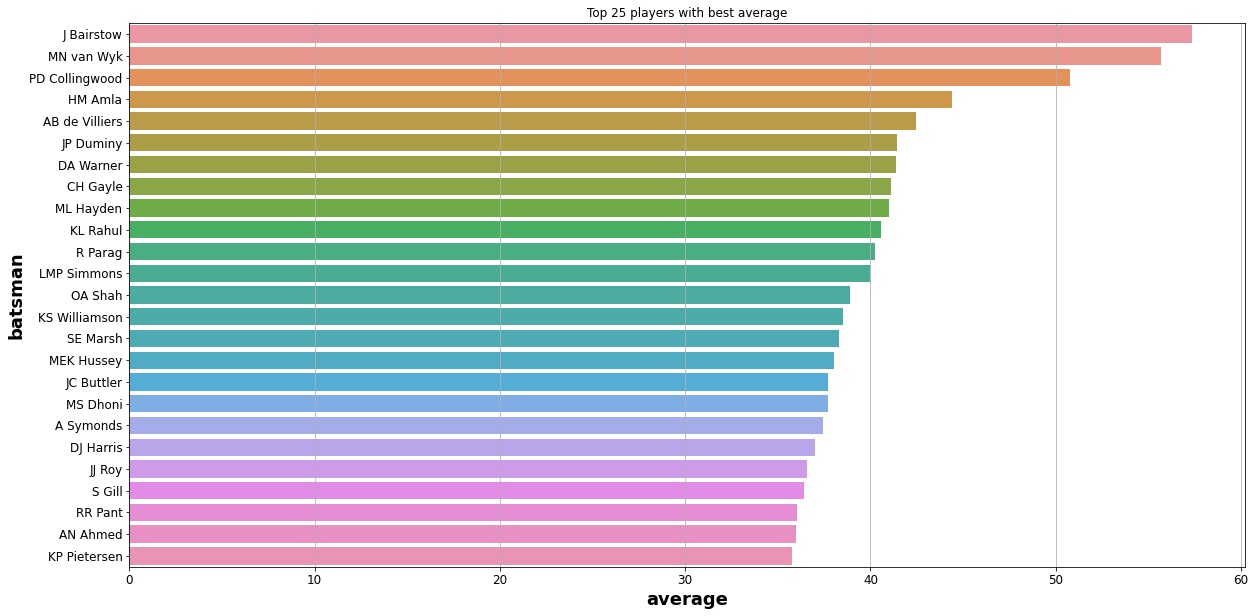

In [34]:
# Lets plot the top 25 players graph
plt.figure(figsize = (20, 10))
plt.grid()

plt.xlabel('Average Runs', fontweight = 'bold', fontsize = 18)
plt.ylabel('Players', fontweight = 'bold', fontsize = 18)

plt.tick_params(labelsize = 12)
plt.title('Top 25 players with best average')
sns.barplot(x = 'average', y = 'batsman', data = highest_total_average_df);

## **Conclusion**

**We can see that 'J Bairstow' have the best average score, followed by the MN Van Wyk**

## **Task-4 Player with best strike rate and also scored more than 3000 runs**

### **In this step we will be getting the Player with the best strike rate and scored more than 3000 runs**

In [35]:
# Lets sort the values according to strike rate
runs_df.sort_values(by = 'total_runs', ascending = False, inplace = True)

In [36]:
# Top 25 IPL Players with the best strike rate
best_strike_rate_df = runs_df.head(25).copy().reset_index()

In [37]:
# Runs above 3000 runs
best_strike_rate_df = best_strike_rate_df[best_strike_rate_df['total_runs'] > 3000] 

In [38]:
# Get columns
best_strike_rate_df = best_strike_rate_df[['batsman', 'total_runs','strike_rate']]

In [39]:
# Print df
best_strike_rate_df

,batsman,total_runs,strike_rate
0,V Kohli,5426,131.987351
1,SK Raina,5386,137.538304
2,RG Sharma,4902,130.999466
3,DA Warner,4717,143.286756
4,S Dhawan,4601,125.538881
5,CH Gayle,4525,152.254374
6,MS Dhoni,4450,138.802246
7,RV Uthappa,4420,130.730553
8,AB de Villiers,4414,152.101999
9,G Gambhir,4219,124.088235


In [40]:
# Sort the values
best_strike_rate_df.sort_values(by = 'strike_rate', ascending = True, inplace = True)

In [41]:
best_strike_rate_df

,batsman,total_runs,strike_rate
10,AM Rahane,3834,122.374721
9,G Gambhir,4219,124.088235
4,S Dhawan,4601,125.538881
13,AT Rayudu,3313,126.643731
11,KD Karthik,3669,130.430146
7,RV Uthappa,4420,130.730553
2,RG Sharma,4902,130.999466
0,V Kohli,5426,131.987351
1,SK Raina,5386,137.538304
6,MS Dhoni,4450,138.802246


In [44]:
# Graph of players
import plotly.graph_objs as go
total_runs = go.Bar(x = best_strike_rate_df['batsman'], y = best_strike_rate_df['total_runs'], name = 'Total Runs', marker = dict(color = '#03CEA4'))
strike_rate = go.Bar(x = best_strike_rate_df['batsman'], y = best_strike_rate_df['strike_rate'], name = 'Strike Rate', marker = dict(color = '#F6F930'))
data = [total_runs, strike_rate]

In [46]:
from plotly.offline import iplot

layout = go.Layout(title = 'Players with best strike rate and runs above 3000', xaxis = dict(title = 'Batsmen'), yaxis = dict(title = 'Total Runs'), bargap = 0.2, bargroupgap = 0.1)

figure = go.Figure(data = data, layout = layout)
iplot(figure)

## **Conclusion**

**We can see that 'Chris Gayle' has the best strike rate, followed by the 'AB De Velliers, whereass V Kohli and Sk Raina leads in total number of runs**

## **Task-5 Players with more than 4000 runs, strike rate above 130 and average above 30**

### **In this step we will be getting the players with more than 400 runs and strike rate above 130 and average above 30**

In [47]:
# Lets sort the values
runs_df.sort_values(by = 'total_runs', ascending = False, inplace = True)

In [48]:
# Top IPL Players with more than 4000 runs
best_players_df = runs_df.loc[runs_df['total_runs'] > 4000]

In [49]:
best_players_df

,batsman,total_runs,out,number_of_balls,average,strike_rate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881
5,CH Gayle,4525,110,2972,41.136364,152.254374
6,MS Dhoni,4450,118,3206,37.711864,138.802246
7,RV Uthappa,4420,156,3381,28.333333,130.730553
8,AB de Villiers,4414,104,2902,42.442308,152.101999
9,G Gambhir,4219,134,3400,31.485075,124.088235


In [50]:
# Get the values where strike rate more than 130
best_players_df = best_players_df.loc[best_players_df['strike_rate'] > 130]

In [51]:
best_players_df

,batsman,total_runs,out,number_of_balls,average,strike_rate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
5,CH Gayle,4525,110,2972,41.136364,152.254374
6,MS Dhoni,4450,118,3206,37.711864,138.802246
7,RV Uthappa,4420,156,3381,28.333333,130.730553
8,AB de Villiers,4414,104,2902,42.442308,152.101999


In [52]:
# Get the values where average more than 30
best_players_df = best_players_df.loc[best_players_df['average'] > 30]

In [53]:
best_players_df

,batsman,total_runs,out,number_of_balls,average,strike_rate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
5,CH Gayle,4525,110,2972,41.136364,152.254374
6,MS Dhoni,4450,118,3206,37.711864,138.802246
8,AB de Villiers,4414,104,2902,42.442308,152.101999


In [54]:
# Let's drop extra columns
best_players_df = best_players_df.drop(columns = ['out', 'number_of_balls'])

In [55]:
best_players_df

,batsman,total_runs,average,strike_rate
0,V Kohli,5426,35.697368,131.987351
1,SK Raina,5386,33.662500,137.538304
2,RG Sharma,4902,30.447205,130.999466
3,DA Warner,4717,41.377193,143.286756
5,CH Gayle,4525,41.136364,152.254374
6,MS Dhoni,4450,37.711864,138.802246
8,AB de Villiers,4414,42.442308,152.101999


In [ ]:
# We can Conclude that these 8 players are the best batsman in the IPL

In [56]:
# Let's plot the graph to get better idea
average = go.Bar(x = best_players_df['batsman'], y = best_players_df['average'], name = 'Player Average', marker = dict(color = '#00D9C0'))
strike_rate = go.Bar(x = best_players_df['batsman'], y = best_players_df['strike_rate'], name = 'Strike Rate', marker = dict(color = '#FFC43D'))

data = [average, strike_rate]

In [57]:
layout = go.Layout(title = 'Player Average and Strike Rate', xaxis = dict(title = 'Batsman'), yaxis = dict(title = 'Total'), bargap = 0.2, bargroupgap = 0.1)

figure = go.Figure(data = data, layout = layout)
iplot(figure)

In [58]:
# Plot total runs graph
total_runs = go.Bar(x = best_players_df['batsman'], y = best_players_df['total_runs'], name = 'Total Runs', marker = dict(color = '#FF4365'))
data = [total_runs]

In [59]:
layout = go.Layout(title = 'Total Runs', xaxis = dict(title = 'Batsman'), yaxis = dict(title = 'Total Runs'), bargap = 0.2, bargroupgap = 0.1)
figure = go.Figure(data = data, layout = layout)
iplot(figure)

# **Conclusion of Runs and Strike Rate analysis**

**Data Cleaning**
1. There are No Null values in this dataset
2. We just updated some of the column names - numberofballs : number_of_balls, strikerate : strike_rate

# **Exploratory Data Analysis of Runs and Average Strike Rate DataFrame**

**Runs Analysis**
1. Player with highest total runs - Virat Kohli 5426 runs, Suresh K Raina 5366 runs, followed by the Rohit G Sharma 4902 runs
2. Players that got out highest number of times - Rohit Sharma 161 times, Suresh K Raina 160 times, followed by the Robin Uthappa 156 times and Virat Kohli 152 times
3. Players with best average runs - J Bairstow 57.37 runs, MN Van 55.67 runs, and PD Collingwood 50.7 runs
***Above data shows that Virat Kohli, Suresh Raina, and Rohit Sharma are leading in the total number of runs**

##------------------------------------------------------------------##

**Strike Rate Data Analysis**
1. Players with best strike rate and more than 300 runs - Chris Gayle 152 rate, AB De Villiers 152 rate, and YK Pathan 143 rate
2. Players with more than 4000 runs, strike rate above 130 and average above 30 - V Kohli, SK Raina, RG Sharma, DA Warner, CH Gayle, MS Dhoni, AB De Villiers
***Above analysis shows that Chris Gayle and AB De Villiers are players with best strike rate**

##------------------------------------------------------------------##

**Player Data Analysis**
1. Player of the match most number of times - Chris Gayle 21 times, Ab De Villiers 20 times, MS Dhoni 17 Times followed by Rohit Sharma and David Warner

##------------------------------------------------------------------##

**Final Conclusion**
1. Chris Gayle, Ab De Villiers, and David Warner are International Best Players of the IPL
2. Virat Kohli, Suresh Raina, Rohit Sharma and MS Dhoni and National best players of the IPL
